# Carbon Sources in the Autotrophic iJN678 Model

## Lab Problem #2:

Create a table that shows the carbon sources that can be supported aerobically and anaerobically by the iJN678 model in an autotrophic environment.

In [1]:
import cobra.test
import escher
from escher import Builder
import numpy as np
import pandas as pd
from cobrapy_bigg_client import client
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

### Setting the autotropic conditions

In [2]:
model = client.download_model('iJN678', save=False) # Download model from the BIGG database

# Set Biomass Function
model.objective = 'BIOMASS_Ec_SynAuto'
model.reactions.BIOMASS_Ec_SynHetero.bounds = [-0,0]
model.reactions.BIOMASS_Ec_SynMixo.bounds = [-0,0]

# Autotropic Conditions
model.reactions.EX_photon_e.bounds = [-100,0]
model.reactions.EX_glc__D_e.bounds = [-0,0]
model.reactions.EX_hco3_e.bounds = [-3.7,0]
model_orig = model.copy()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10
Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpl5ifnt2b.lp
Reading time = 0.01 seconds
: 795 rows, 1726 columns, 8316 nonzeros


### Find default carbon sources for autotropic operation

In [3]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0003987,0,0.00%
cobalt2_e,EX_cobalt2_e,0.0002874,0,0.00%
cu2_e,EX_cu2_e,0.0002658,0,0.00%
fe2_e,EX_fe2_e,0.0006614,0,0.00%
fe3_e,EX_fe3_e,0.0006022,0,0.00%
h_e,EX_h_e,4.579,0,0.00%
hco3_e,EX_hco3_e,3.7,1,99.99%
k_e,EX_k_e,0.01495,0,0.00%
mg2_e,EX_mg2_e,0.002541,0,0.00%
mn2_e,EX_mn2_e,0.0002676,0,0.00%


From this summary we can see that the only default carbon source is bicarbonate (hco3_e)

### Exchange Reactions (Carbon Sources) that Allow Aerobic Growth

Find the exchange reactions that allow growth in an aerobic environment.

In [4]:
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_hco3_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -3.7 ## Set the default flux to 3.7
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    #print(exchange_ids[i], growth_rate[i])

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpc5b5tg7v.lp
Reading time = 0.01 seconds
: 795 rows, 1726 columns, 8316 nonzeros


In [5]:
Aerobic_carbon_growth_rate = {'Exchange Reaction': exchange_ids,
                     'Aerobic Growth Rate': growth_rate}
Aerobic_df = pd.DataFrame(Aerobic_carbon_growth_rate, columns = ['Exchange Reaction','Aerobic Growth Rate'])
df1 = Aerobic_df
df1 = df1.round(4) # Round to 4 digits
df1 = df1.replace(0, np.nan) # Replace zeros with NaN
df1 = df1.dropna() # Remove rows with NaN values
df1 = df1.reset_index(drop=True)
df1

,Exchange Reaction,Aerobic Growth Rate
0,EX_ac_e,0.1767
1,EX_pyr_e,0.2651
2,EX_fum_e,0.3263
3,EX_succ_e,0.3362
4,EX_cit_e,0.3779
5,EX_glc__D_e,0.4909
6,EX_fru_e,0.4909
7,EX_glu__L_e,0.4418
8,EX_hco3_e,0.0884
9,EX_co2_e,0.0884


The total number of metabolites (exhange reactions) that can grow in aerobic conditions is 11.

A histogram of the aerobic growth rates from the different exchange reactions

array([[<AxesSubplot:title={'center':'Aerobic Growth Rate'}>]],
      dtype=object)

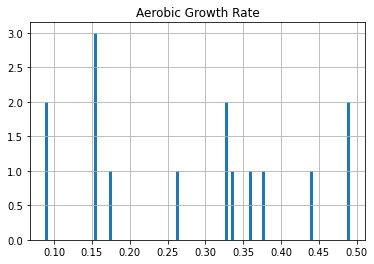

In [6]:
df1.hist(bins=100)

### Exchange Reactions (Carbon Sources) that Allow Anaerobic Growth

Find the exchange reactions that allow growth in an anaerobic environment.

In [7]:
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = 0
model.reactions.EX_hco3_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -3.7
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpk1wijqa8.lp
Reading time = 0.01 seconds
: 795 rows, 1726 columns, 8316 nonzeros


In [8]:
Anaerobic_carbon_growth_rate = {'Exchange Reaction': exchange_ids,
                     'Anaerobic Growth Rate': growth_rate}
Anaerobic_df = pd.DataFrame(Anaerobic_carbon_growth_rate, columns = ['Exchange Reaction','Anaerobic Growth Rate'])
df2 = Anaerobic_df
df2 = df2.round(4) # Round to 4 digits
df2 = df2.replace(0, np.nan) # Replace zero with NaN
df2 = df2.dropna() # Remove rows with NaN
df2 = df2.reset_index(drop=True)
df2

,Exchange Reaction,Anaerobic Growth Rate
0,EX_ac_e,0.1767
1,EX_pyr_e,0.2651
2,EX_fum_e,0.3263
3,EX_succ_e,0.3362
4,EX_cit_e,0.3779
5,EX_glc__D_e,0.4909
6,EX_fru_e,0.4909
7,EX_glu__L_e,0.4418
8,EX_hco3_e,0.0884
9,EX_co2_e,0.0884


The total number of metabolites (exhange reactions) that can grow in anaerobic conditions is zero

A histogram of the anaerobic growth rates from the different exchange reactions

array([[<AxesSubplot:title={'center':'Anaerobic Growth Rate'}>]],
      dtype=object)

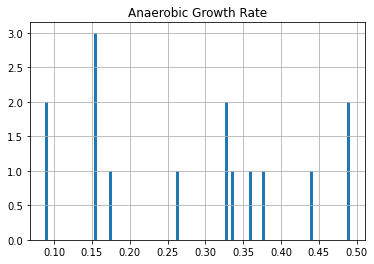

In [9]:
df2.hist(bins=100)

### Growth Rate Table for Exchange Reactions
Create a table showing the growth rates of the exchange reactions in both aerobic and anaerobic conditions.

In [10]:
df3 = Aerobic_df.join(Anaerobic_df.set_index('Exchange Reaction'), on='Exchange Reaction')
df3 = df3.round(4) # Round to four digits
df3 = df3.replace(0, np.nan) # Replace zero with NaN
df3 = df3.dropna(how = 'all', subset=['Aerobic Growth Rate', 'Anaerobic Growth Rate']) # Remove NaN's found in both columns
df3 = df3.replace(np.nan, 0)
df3 = df3.reset_index(drop=True)
df3

,Exchange Reaction,Aerobic Growth Rate,Anaerobic Growth Rate
0,EX_ac_e,0.1767,0.1767
1,EX_pyr_e,0.2651,0.2651
2,EX_fum_e,0.3263,0.3263
3,EX_succ_e,0.3362,0.3362
4,EX_cit_e,0.3779,0.3779
5,EX_glc__D_e,0.4909,0.4909
6,EX_fru_e,0.4909,0.4909
7,EX_glu__L_e,0.4418,0.4418
8,EX_hco3_e,0.0884,0.0884
9,EX_co2_e,0.0884,0.0884
